In [1]:
!pip install pandas

In [2]:

import numpy as np

In [3]:
import json
with open('../artifacts/kaggle.json', 'r') as file:
    data = json.load(file)

In [4]:

data

{'username': 'nishakajayalath', 'key': '8ea571f06b2e93ea939c182c9cfcc843'}

In [5]:
import os
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']


In [6]:

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [7]:
api.dataset_download_files('dineshpiyasamara/sentiment-analysis-dataset', path='../artifacts/')

Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset


In [8]:
import zipfile
with zipfile.ZipFile('../artifacts/sentiment-analysis-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('../artifacts/')

In [9]:
!pip install matplotlib

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [12]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessi

In [13]:
data.shape

(7920, 3)

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [16]:
import re
import string

In [17]:
data["tweet"].head(5)


0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [18]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [19]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links


In [20]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [21]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Remove punctuations

In [23]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)
    

In [24]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove numbers

In [25]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)


In [26]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords


In [27]:
!pip install nltk

In [28]:
import nltk

In [29]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [31]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [33]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [34]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [35]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [36]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Building Vacabulary

In [37]:
from collections import Counter
vocab = Counter()

In [38]:
vocab

Counter()

In [39]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [40]:
vocab


Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [41]:
data.shape

(7920, 3)

In [42]:

tokens = [key for key in vocab if vocab[key] > 10]


In [43]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [44]:
len(tokens)

1145

tokens

In [45]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [46]:
x= data['tweet']
y=data['label']

In [47]:
!pip install scikit-learn

In [48]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [49]:
x_train.shape

(6336,)

In [50]:
x_test.shape

(1584,)

In [51]:
x_train

1308    beauti shop aliusaexpress iphon io app cat gb ...
3781    royalti juicyjelli royal drink lyche best fun ...
7308    amaz night klaverfabrikken amaz beauti copenha...
2454    best friend best friend cilacap miss samsung b...
4833    gotta fashion case likeacharm iphon iphon leop...
                              ...                        
6639    fuckyou appl way samsung galaxi better iphon y...
2103    love play guitar explor enjoylif friend parti ...
3693       itun still check updat immedi instal updat wtf
3238    fuck stupid headphon appl headphon wast money ...
284     downgrad phone backup arent compat version ret...
Name: tweet, Length: 6336, dtype: object

In [52]:
x_test

5698    remov thing phone appl decid put hateu violate...
4127    wifi hake password android app unitedst cute c...
6911                      phone blank past two hour iphon
6890    cant lie im love new iphon plu appl iphon ipho...
261             appl roll verizon iphon valentin day sale
                              ...                        
6642    sit appl store wait phone restor take minut re...
6072    ah appl itun updateit amaz report sarcastivil ...
2074    michel came home tcot nascar theater movi sing...
3692    forev love cocacola drink alon bottl appl ipho...
2731    kendal jenner goe braless show… news photograp...
Name: tweet, Length: 1584, dtype: object

### Ventorization

In [53]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [54]:
vectorized_x_train = vectorizer(x_train,tokens)

In [55]:
vectorized_x_test = vectorizer(x_test,tokens)

In [56]:
y_train.value_counts()

label
0    4731
1    1605
Name: count, dtype: int64

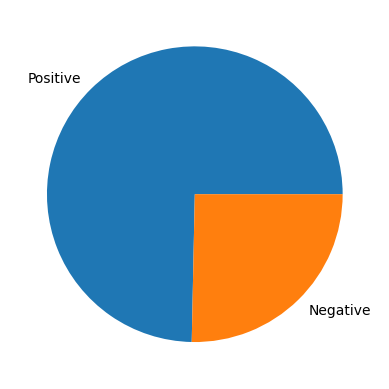

In [59]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [68]:
!pip install imbalanced-learn

In [71]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip uninstall scipy



In [ ]:
pip install scipy==1.12.0


### Handle imbalanced dataset

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9462, 1145) (9462,)


In [61]:
y_train_smote.value_counts()

label
0    4731
1    4731
Name: count, dtype: int64

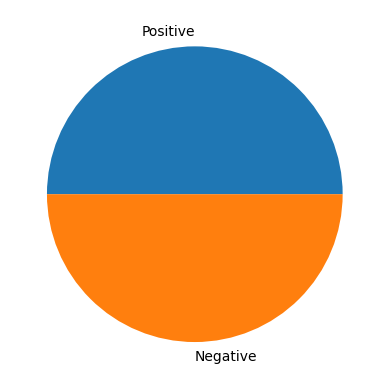

In [62]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [64]:
vectorized_x_train_smote

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9462, 1145), dtype=float32)

In [65]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [66]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [67]:
y_test

5698    1
4127    0
6911    1
6890    0
261     0
       ..
6642    1
6072    0
2074    0
3692    0
2731    0
Name: label, Length: 1584, dtype: int64

## Model Tranning and Evaluation

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [82]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.941
	Precision = 0.919
	Recall = 0.968
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.868
	Precision = 0.716
	Recall = 0.834
	F1-Score = 0.771


In [74]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], shape=(9462,))

In [75]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9457    1
9458    1
9459    1
9460    1
9461    1
Name: label, Length: 9462, dtype: int64

In [78]:
y_test_pred

array([1, 0, 1, ..., 0, 0, 0], shape=(1584,))

In [79]:
y_test

5698    1
4127    0
6911    1
6890    0
261     0
       ..
6642    1
6072    0
2074    0
3692    0
2731    0
Name: label, Length: 1584, dtype: int64

### Naive Bayes

In [83]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.871
	Recall = 0.958
	F1-Score = 0.913
Testing Scores:
	Accuracy = 0.872
	Precision = 0.697
	Recall = 0.919
	F1-Score = 0.793


### Decision Tree

In [86]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.827
	Precision = 0.678
	Recall = 0.665
	F1-Score = 0.671


### Random Forest

In [89]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.86
	Precision = 0.751
	Recall = 0.708
	F1-Score = 0.729


### Support Vector Machine


In [90]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.977
	Precision = 0.961
	Recall = 0.995
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.867
	Precision = 0.738
	Recall = 0.777
	F1-Score = 0.757


In [91]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)